# PreProcessing using scikit-learn


1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features


#### Common import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning




## 2. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://miro.medium.com/max/1024/0*PXGPVYIxyI_IEHP7.">


* If data is not normally distributed, this is not the best scaler to use.

In [2]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [3]:
df

,x1,x2,x3
0,-1.338960,9.932162,-9.510664
1,-0.012567,2.824733,-17.271126
2,0.381340,4.281562,-3.609160
3,3.755474,3.440309,7.365694
4,3.654857,1.075532,-11.266179
...,...,...,...
9995,2.133597,1.560209,-6.785523
9996,-0.302862,6.848787,-8.110904
9997,0.262291,6.448303,-6.685571
9998,0.693642,7.386813,-4.184161


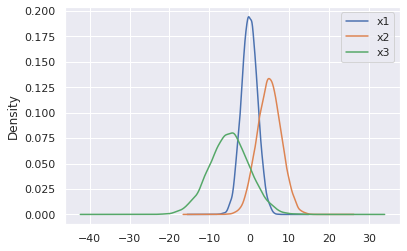

In [4]:
# plotting data

df.plot.kde()

In [6]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()


In [7]:
data_tf = standardscaler.fit_transform(df)

In [8]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

In [9]:
df

,x1,x2,x3
0,-0.684719,1.662354,-0.910492
1,-0.022156,-0.727357,-2.463344
2,0.174609,-0.237531,0.270386
3,1.860062,-0.520384,2.466430
4,1.809802,-1.315486,-1.261767
...,...,...,...
9995,1.049899,-1.152524,-0.365197
9996,-0.167165,0.625639,-0.630403
9997,0.115141,0.490986,-0.345197
9998,0.330610,0.806538,0.155329


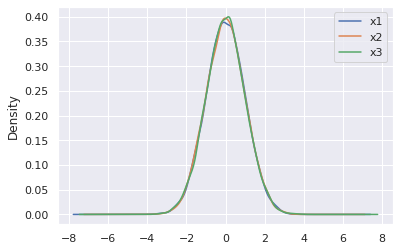

In [10]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://cdn-images-1.medium.com/max/800/0*K2QwZ16bEAxA4hUe.jpg">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [11]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [12]:
df

,x1,x2,x3
0,4.311870,33.413789,45.467712
1,8.967614,26.295485,53.490187
2,18.426468,32.450548,52.232562
3,4.099187,33.118476,53.091052
4,13.338486,31.087803,58.876534
...,...,...,...
995,8.737057,34.727684,53.039583
996,10.298311,28.399781,49.460741
997,4.239785,25.851026,50.357680
998,10.033605,33.181869,50.691690


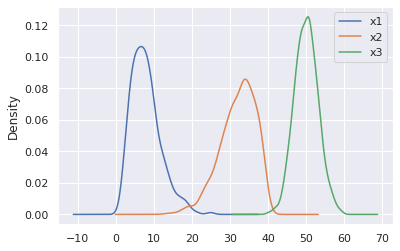

In [13]:
df.plot.kde()

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

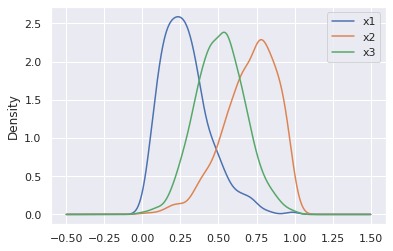

In [16]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [1]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

NameError: name 'pd' is not defined

In [18]:
df

,x1,x2
0,19.816881,30.024682
1,22.754873,29.742768
2,19.430096,29.540980
3,21.137226,29.784776
4,18.576194,30.224738
...,...,...
1020,1.438717,48.793074
1021,0.759489,49.922839
1022,1.372361,49.445433
1023,0.293216,49.984727


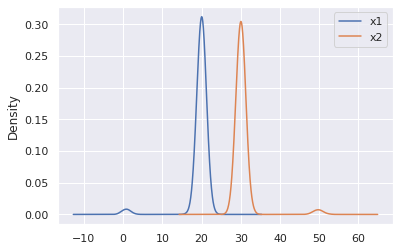

In [19]:
df.plot.kde()

In [20]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [21]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

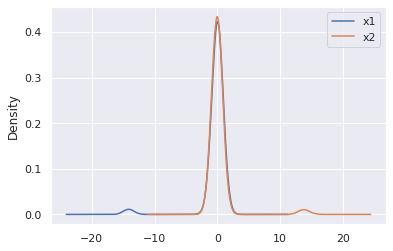

In [22]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [23]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [24]:
df

,x1,y1,z1
0,-91.0,49.0,-56.0
1,-47.0,62.0,4.0
2,47.0,32.0,-14.0
3,9.0,-31.0,132.0
4,34.0,79.0,-77.0
...,...,...,...
995,98.0,-80.0,-34.0
996,92.0,8.0,-66.0
997,96.0,56.0,53.0
998,88.0,25.0,-135.0


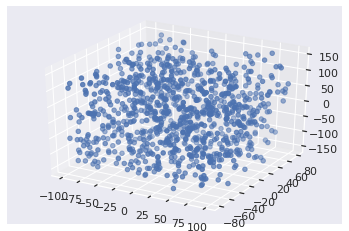

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [26]:
from sklearn.preprocessing import Normalizer

In [27]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [28]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

In [29]:
df

,x1,y1,z1
0,-0.774139,0.416844,-0.476393
1,-0.603308,0.795853,0.051345
2,0.802628,0.546470,-0.239081
3,0.066230,-0.228126,0.971376
4,0.294530,0.684348,-0.667023
...,...,...,...
995,0.748113,-0.610705,-0.259550
996,0.810518,0.070480,-0.581458
997,0.779664,0.454804,0.430439
998,0.539623,0.153302,-0.827831


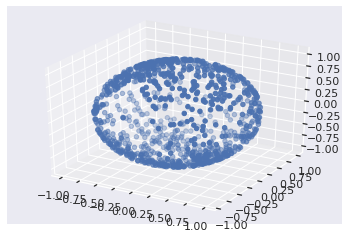

In [30]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [31]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [32]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [33]:
data_tf = binarizer.fit_transform(X)

In [34]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [35]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [36]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [116]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [37]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [38]:
df

,Age,Gender
0,33,Male
1,44,Female
2,22,Male
3,44,Female
4,55,Male
5,22,Male


In [39]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [42]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [43]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [44]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])